In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
base = pd.read_csv('../dados/AirPassengers.csv')
#passando dados para data
dateparse = lambda dates:pd.datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('dados/AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser=dateparse)
#transformando dataframe para series
ts = base['#Passengers']

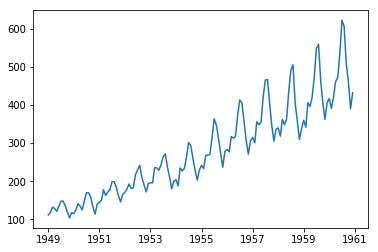

In [3]:
plt.plot(ts)

In [4]:
#fazendo previsões para a frente

#média
ts.mean()

280.2986111111111

In [5]:
#média do último ano
ts['1960-01-01':'1960-12-01'].mean()

476.1666666666667

In [6]:
#média móvel
media_movel = ts.rolling(window=12).mean()
media_movel

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    126.666667
1950-01-01    126.916667
1950-02-01    127.583333
1950-03-01    128.333333
1950-04-01    128.833333
1950-05-01    129.166667
1950-06-01    130.333333
1950-07-01    132.166667
1950-08-01    134.000000
1950-09-01    135.833333
1950-10-01    137.000000
1950-11-01    137.833333
1950-12-01    139.666667
1951-01-01    142.166667
1951-02-01    144.166667
1951-03-01    147.250000
1951-04-01    149.583333
1951-05-01    153.500000
1951-06-01    155.916667
                 ...    
1958-07-01    376.333333
1958-08-01    379.500000
1958-09-01    379.500000
1958-10-01    380.500000
1958-11-01    380.916667
1958-12-01    381.000000
1959-01-01    382.666667
1959-02-01    384.666667
1959-03-01    388.3

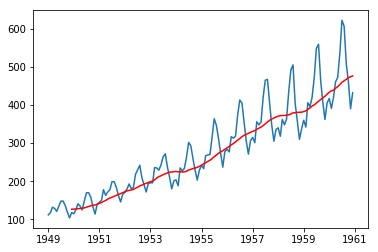

In [7]:
plt.plot(ts)
plt.plot(media_movel, color='red')

In [9]:
previsoes = []
for i in range(1,13):
    superior = len(media_movel) - i
    inferior = superior - 11
    '''print(inferior)
    print(superior)
    print('----')'''
    previsoes.append(media_movel[inferior:superior].mean())

In [10]:
previsoes

[453.52272727272737,
 449.37878787878793,
 444.9318181818182,
 440.5,
 436.04545454545456,
 431.5,
 427.1060606060606,
 422.75757575757575,
 418.52272727272725,
 414.34848484848493,
 409.90909090909093,
 405.50757575757575]

In [12]:
previsoes = previsoes[::-1]
previsoes

[405.50757575757575,
 409.90909090909093,
 414.34848484848493,
 418.52272727272725,
 422.75757575757575,
 427.1060606060606,
 431.5,
 436.04545454545456,
 440.5,
 444.9318181818182,
 449.37878787878793,
 453.52272727272737]

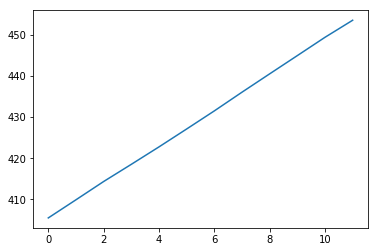

In [13]:
plt.plot(previsoes)

In [14]:
#Parte 2: utilizando arima para previsão
from statsmodels.tsa.arima_model import ARIMA

In [15]:
#parâmetros: p, q e d
modelo = ARIMA(ts, order=(2,1,2))

c:\users\vinif\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\vinif\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [16]:
modelo_treinado = modelo.fit()

In [17]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.713
Date:                Thu, 27 Dec 2018   AIC                           1344.043
Time:                        16:59:14   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9099      0.065    -29.520      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9997      0.068     14.809      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2964j            1.0001           -0.0479
MA.2            0.9552           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

In [21]:
previsoes2 = modelo_treinado.forecast(steps=12)[0]

In [22]:
previsoes2

array([433.11720317, 450.88482922, 479.80725567, 511.96785232,
       539.31992078, 555.80410072, 558.75389284, 549.28600792,
       531.66537615, 511.9038785 , 496.0289052 , 488.50473201])

Figure(432x288)


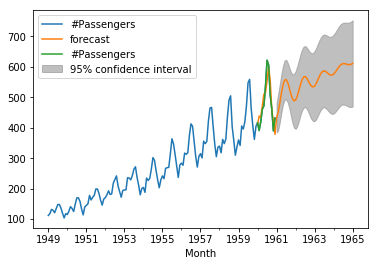

In [25]:
eixo = ts.plot()
print(modelo_treinado.plot_predict('1960-01-01', '1965-01-01', ax=eixo, plot_insample=True))

In [27]:
#Auto-Arima
from pyramid.arima import auto_arima

c:\users\vinif\appdata\local\programs\python\python36\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


In [28]:
modelo_auto = auto_arima(ts, n=12, seasonal=True, trace=True)
modelo_auto

c:\users\vinif\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1344.044, BIC=1361.821, Fit time=1.504 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1415.278, BIC=1421.203, Fit time=0.073 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1403.473, BIC=1412.361, Fit time=0.092 seconds


c:\users\vinif\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
c:\users\vinif\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1398.827, BIC=1407.716, Fit time=0.225 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1371.827, BIC=1386.641, Fit time=0.343 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds


c:\users\vinif\appdata\local\programs\python\python36\lib\site-packages\pyramid\arima\auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1361.693, BIC=1376.507, Fit time=0.566 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds


c:\users\vinif\appdata\local\programs\python\python36\lib\site-packages\pyramid\arima\auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1396.121, BIC=1407.972, Fit time=0.355 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 3.303 seconds


c:\users\vinif\appdata\local\programs\python\python36\lib\site-packages\pyramid\arima\auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 3) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend='c')

In [29]:
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -666.022
Date:                Thu, 27 Dec 2018   AIC                           1344.044
Time:                        17:06:45   BIC                           1361.821
Sample:                             0   HQIC                          1351.268
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6620      0.193      3.426      0.001       0.283       1.041
ar.L1          1.6480      0.028     58.884      0.000       1.593       1.703
ar.L2         -0.9096      0.025    -36.750      0.000      -0.958      -0.861
ma.L1         -1.9079      0.356     -5.366      0.000      -2.605      -1.211
ma.L2          0.9977      0.371      2.687      0.007       0.270       1.726
sigma2       611.8715    247.216      2.475      0.013     127.336    1096.407
===================================================================================
Ljung-Box (Q):                      358.22   Jarque-Bera (JB):                 2.78
Prob(Q):                              0.00   Prob(JB):                         0.25
Heteroskedasticity (H):               7.02   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
proximos_12 = modelo_auto.predict(n_periods=12)
proximos_12

array([434.22987516, 453.11302761, 482.86530147, 515.38157961,
       542.56627745, 558.45065996, 560.56226561, 550.2557442 ,
       532.01243715, 511.98519052, 496.23737802, 489.164531  ])